# K-means

## Introduction

Perhaps one of the most popular clustering methods is the K-means method. K-means is often referred to as Lloyd’s algorithm.

```{admonition} The uses of K-means
:class: tip, dropdown
The uses of K-means include:
* Search engine: Search engine, groups results together using clustering algorithm
* Customer segmentation: K-means clustering can be used to create customer clusters based on demographic information, geographical information and behavioral data
* Social network analysis: To find groups of people with specific interest to direct the personalized ads
* Data center: To organize the computer clusters in data center
* Inventory management: Create inventory clusters based on sales number and manufacturing capacity
```



The main idea of the method is the iterative repetition of two steps:

1. **distribution of sample objects into clusters;**

2. **recalculation of cluster centers.**


![kmeans](assets/kmeans.gif)

## How K-Means works

Let's begin by randomly picking some starting points in our world of features. We call these points 'Cluster Centers,' and we'll denote them as

$$
    µ^0 = (µ_{1}^0, . . . , µ_{k}^0).
$$

Each of our data points, labeled j (where j goes from 1 to m), finds its home in the cluster whose center is the closest. Think of it like finding the cozy spot nearest to you!

Here's how we decide that: we use a formula,

$$
    z^j = \arg \min_{i} ||x_{j} − µ_{i}^t||_{2}^2,
$$

which is like saying, 'Which cluster center (µ) is the closest to our data point (x_j)?'

The interesting part is that we're on a mission to find the best spots for our Cluster Centers. We keep shuffling our data points between the clusters and adjusting the Cluster Centers until things settle down. It's like arranging furniture in a room until everyone's comfy. This shuffle-and-adjust dance is our way of making sure our clusters are just right.

Now, imagine two main moves in our dance. First, the 'Assignment Step': we assign each data point to its closest Cluster Center. Picture it as deciding where each piece of furniture should go based on proximity. Then comes the 'Move Centroid Step': we recalculate the Cluster Centers by finding the average position of all the data points in each cluster. It's like finding the center of mass for each cluster.

Next, we need to figure out how many clusters we want. Let's call this number 'K.' We randomly place K points in our world and call them 'Cluster Centroids.' Initially, these centroids are like tourists wandering around randomly. But as we keep reassigning and adjusting, these centroids find their true homes at the heart of their clusters.

We keep going through the shuffle-and-adjust routine until our Cluster Centers decide, 'This is it, we're not moving anymore!' Once they're content, we've successfully 'converged' our K-Means algorithm. The data points now belong to their respective clusters.

The formula

$$
    µ_{i}^{t+1} = \arg \min_{µ} \sum\limits_{j:z^j=i}||x_{j} − µ||_{2}^2.
$$

is our way of fine-tuning the Cluster Centers during each adjustment. It's like finding the sweet spot that minimizes the total distance between data points and their cluster center.  

```{figure} assets/Inner_Working_K_Means.jpg
:name: kmeans

K-means scheme
```

## Selecting an Initial Approximation

The first question when choosing the initial position of centers is how, when choosing centers from some random distribution, not to end up in a region of the feature space where there are no sampling points. The basic solution is to simply select some of the sample objects as centers.

The second potential problem is the crowded placement of centers. In this case, their initial position will most likely be far from the final position of the cluster centers. For example, for such initial positions of the centers we will get incorrect clustering.

To combat this phenomenon, it is advantageous to take centers that are as far apart from each other as possible.

In practice, the following methods work:

* The first center is selected randomly from a uniform distribution at the sampling points;

* We select each subsequent center from a random distribution on sample objects, in which the probability of choosing an object is proportional to the square of the distance from it to the nearest cluster center.
```{note}
A modification of K-means that uses this heuristic to select initial guesses is called K-means++.
```

## What K-means optimizes

Let's talk on an intuitive level about what optimization problem K-means solves.

Both steps of the algorithm work to reduce the average square of the Euclidean distance from objects to the centers of their clusters:

$$
    \Phi_0 = \frac{1}{nK} \sum\limits_{k=1}^{K} \sum\limits_{i=1}^{n} (\mu_k - x_i)^2 \mathbb{I}[a(x_i)=k]
$$

At the step of assigning objects to one of the clusters, we select the cluster with the nearest centroid, that is, we minimize each term in
$\Phi_0$: we set all potentially large terms to zero, and leave only the smallest possible ones non-zero (provided the cluster centers are fixed).

At the next step, the step of recalculating cluster centers, we choose a center in such a way that, for a fixed set of objects belonging to the cluster, for all $k$ minimize the expression under the sum by $k$ :

$$
  \sum\limits_{i=1}^{n}  (\mu_k - x_i)^2 \mathbb{I}[a(x_i)=k]
$$


Here it becomes fundamental that we define the square of the distance as the square of the difference of vectors, since it is from here that when differentiating with respect to
$\mu_k$ and writing down the necessary extremum condition, it turns out that the cluster centers need to be recalculated as arithmetic means $x_i$
belonging to the cluster.

<div style="display:none" id="q_ex">W3sicXVlc3Rpb24iOiAiR2l2ZW4gdGhlIHNldCBvZiBwb2ludHMgaW4gb25lLWRpbWVuc2lvbmFsIHNwYWNlOiAkeF8xID0gLTEsIHhfMiA9IDAsIHhfMyA9IDEsIHhfNCA9IDgsIHhfNSA9IDksIHhfNiA9IDEwJCwgYW5kIGFzc3VtaW5nICRLPTIkLCB3aXRoIGluaXRpYWwgY2x1c3RlciBjZW50ZXJzICRjXzEgPSAyJCBhbmQgJGNfMiA9IDgkLCB3aGF0IGFyZSB0aGUgbG9jYXRpb25zIG9mIGNsdXN0ZXIgY2VudGVycyBhdCBjb252ZXJnZW5jZT8iLCAidHlwZSI6ICJtYW55X2Nob2ljZSIsICJhbnN3ZXJzIjogW3siYW5zd2VyIjogIkNsdXN0ZXIgY2VudGVycyBhdCBjb252ZXJnZW5jZTogJGNfMSA9IDIsIGNfMiA9IDgkIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIkluY29ycmVjdC4ifSwgeyJhbnN3ZXIiOiAiQ2x1c3RlciBjZW50ZXJzIGF0IGNvbnZlcmdlbmNlOiAkY18xID0gMCwgY18yID0gOSQiLCAiY29ycmVjdCI6IHRydWUsICJmZWVkYmFjayI6ICJDb3JyZWN0ISJ9LCB7ImFuc3dlciI6ICJDbHVzdGVyIGNlbnRlcnMgYXQgY29udmVyZ2VuY2U6ICRjXzEgPSAtMSwgY18yID0gMTAkIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIkluY29ycmVjdC4ifSwgeyJhbnN3ZXIiOiAiQ2x1c3RlciBjZW50ZXJzIGF0IGNvbnZlcmdlbmNlOiAkY18xID0gMCwgY18yID0gMCQiLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiSW5jb3JyZWN0LiJ9XX1d</div>

In [29]:
from jupyterquiz import display_quiz
display_quiz("#q_ex")

<IPython.core.display.Javascript object>

<div style="display:none" id="q_KMeans_PlusPlus">W3sicXVlc3Rpb24iOiAiV2hhdCBwcm9ibGVtIGRvZXMgdGhlIEstbWVhbnMrKyBtb2RpZmljYXRpb24gYWltIHRvIGFkZHJlc3M/IiwgInR5cGUiOiAibXVsdGlwbGVfY2hvaWNlIiwgImFuc3dlcnMiOiBbeyJhbnN3ZXIiOiAiQ29udmVyZ2VuY2UgaXNzdWVzIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIkluY29ycmVjdC4gSy1tZWFucysrIGlzIG5vdCBkZXNpZ25lZCB0byBjb252ZXJnZW5jZSBpc3N1ZXMuIn0sIHsiYW5zd2VyIjogIlJhbmRvbSBpbml0aWFsaXphdGlvbiB0cmFwIiwgImNvcnJlY3QiOiB0cnVlLCAiZmVlZGJhY2siOiAiQ29ycmVjdCEgSy1tZWFucysrIGFpbXMgdG8gYXZvaWQgdGhlIGlzc3VlcyBhc3NvY2lhdGVkIHdpdGggcmFuZG9tIGluaXRpYWxpemF0aW9uLiJ9LCB7ImFuc3dlciI6ICJFbGJvdyBtZXRob2QgbGltaXRhdGlvbnMiLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiSW5jb3JyZWN0LiBLLW1lYW5zKysgaXMgbm90IHNwZWNpZmljYWxseSBhZGRyZXNzaW5nIGxpbWl0YXRpb25zIG9mIHRoZSBlbGJvdyBtZXRob2QuIn0sIHsiYW5zd2VyIjogIk1pbmktYmF0Y2ggcHJvY2Vzc2luZyBjaGFsbGVuZ2VzIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIkluY29ycmVjdC4gSy1tZWFucysrIGlzIG5vdCByZWxhdGVkIHRvIGNoYWxsZW5nZXMgaW4gbWluaS1iYXRjaCBwcm9jZXNzaW5nLiJ9XX1d</div>

In [30]:
display_quiz("#q_KMeans_PlusPlus")

<IPython.core.display.Javascript object>

## EXAMPLE: Mall Customer Segmentation 

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('https://raw.githubusercontent.com/satishgunjal/datasets/master/Mall_Customers.csv')

### Understanding The Data

- There are 200 unlabelled training examples in total, and we'll utilize annual income and spending score to identify clusters within the data. 
- It's important to note that the spending score, ranging from 1 to 100, is assigned by the mall based on customer behavior and spending habits.

Text(0.5, 1.0, 'Unlabelled Mall Customer Data')

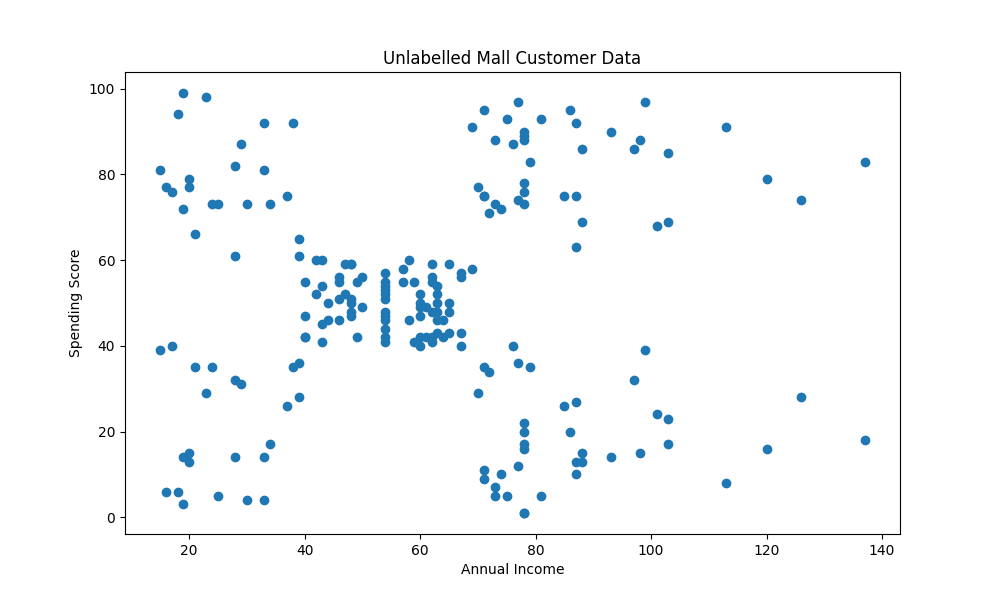

In [32]:
plt.figure(figsize=(10,6))
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Unlabelled Mall Customer Data')

## Random Initialization Trap

Since we have to randomly pick the cluster centroids, it's initialization may affect the final outcome of the clustering. In case our initialization is not correct, then **K-Means algorithm** may form a cluster with few points only. Such situation is referred as **_centroid random initialization trap_** and it may cause algorithm to get stuck at local optima.


```{admonition} Tip
To avoid random initialization trap, follow below guidelines for random initialization:

* Number of cluster centroids should be less than number of training examples
* To avoid local optima issue, try to do multiple random initialization of centroids
* Multiple random initialization technique is more effective when we have a small number of clusters
* Similarly for large number of clusters, few random initialization are sufficient
```

### Choosing The Number of Clusters

So using random initialization we can avoid the local optima issue, but to choose how many clusters to look for in a given data we can use below methods.

#### Elbow Method

In **Elbow method** we run the _K-Means algorithm_ multiple times over a loop, with an increasing number of cluster choice (**_say from 1 to 10_**) and then plotting a clustering score as a function of the number of clusters. **_Clustering score_** is nothing but sum of squared distances of samples to their closest cluster center. **_Elbow_** is the point on the plot where clustering score (**_distortion_**) slows down, and the value of cluster at that point gives us the optimum number of clusters to have. But sometimes we don't get clear elbow point on the plot, in such cases its very hard to finalize the number of clusters.


```{admonition} Advantages and Disadvantages of the Elbow Method
Advantages 
* One of the simplest algorithm to understand
* Since it uses simple computations it is relatively efficient
* Gives better results when there is less data overlapping

Disadvantages 
* Number of clusters need to be defined by user
* Doesn't work well in case of overlapping data
* Unable to handle the noisy data and outliers
* Algorithm fails for non-linear data set
```

In [33]:
X = df.iloc[:, [3,4]].values

clustering_score = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    kmeans.fit(X)
    clustering_score.append(kmeans.inertia_) # inertia_ = Sum of squared distances of samples to their closest cluster center.
    

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

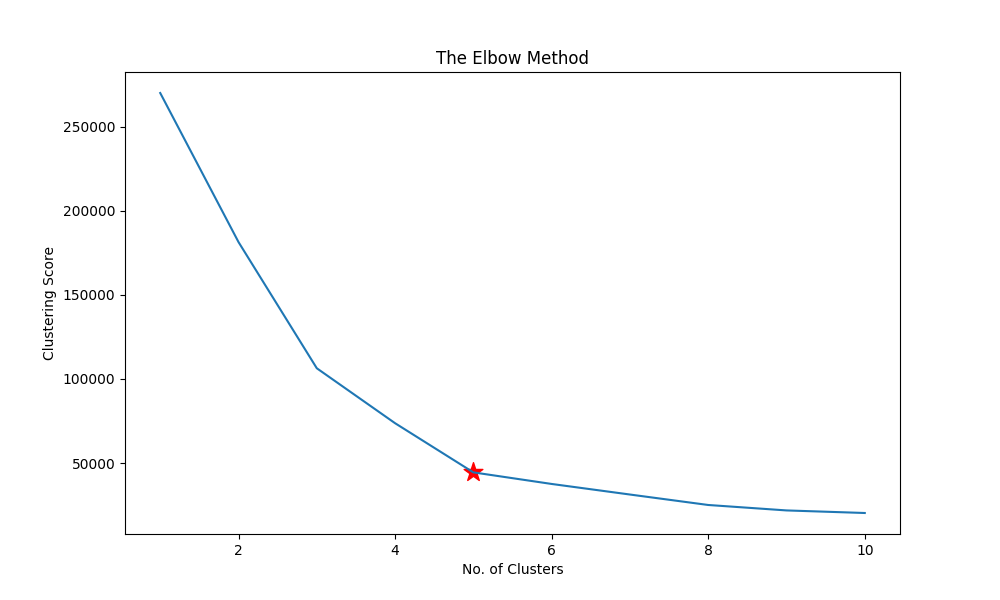

In [34]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), clustering_score)
plt.scatter(5,clustering_score[4], s = 200, c = 'red', marker='*')
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('Clustering Score')
plt.show()

```{warning}
To create the following plot we used inertia_(Sum of squared distances of samples to their closest cluster center)
From the elbow plot choose after which cluster WCSS(Y axis) slows down.
```

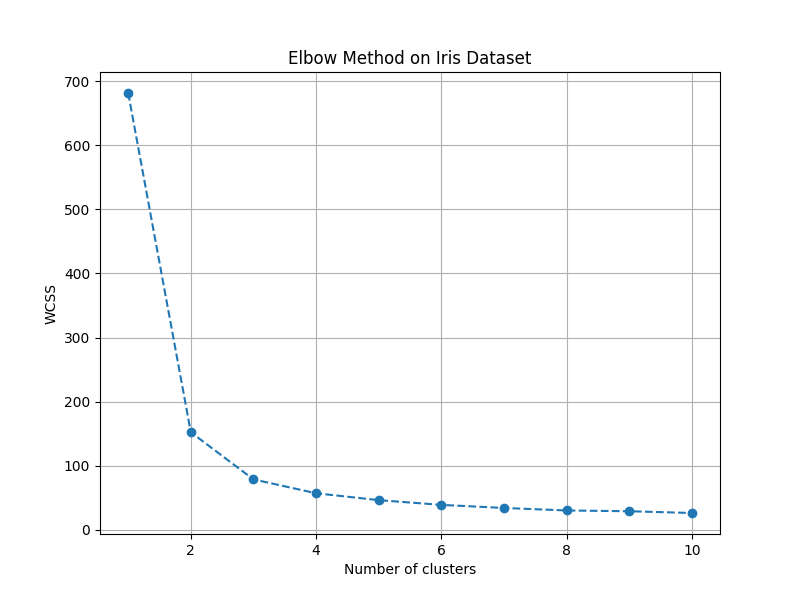

In [35]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data

wcss = []
for i in range(1, 11):    
    kmeans = KMeans(n_clusters=i, init='random', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)    
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method on Iris Dataset')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

<div style="display:none" id="q_Random_Init_Guideline">W3sicXVlc3Rpb24iOiAiVG8gYXZvaWQgdGhlIHJhbmRvbSBpbml0aWFsaXphdGlvbiB0cmFwLCB3aGF0IGd1aWRlbGluZSBpcyBzdWdnZXN0ZWQgZm9yIHRoZSBudW1iZXIgb2YgY2x1c3RlciBjZW50cm9pZHM/IiwgInR5cGUiOiAibXVsdGlwbGVfY2hvaWNlIiwgImFuc3dlcnMiOiBbeyJhbnN3ZXIiOiAiU2hvdWxkIGJlIGdyZWF0ZXIgdGhhbiB0aGUgbnVtYmVyIG9mIHRyYWluaW5nIGV4YW1wbGVzIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIkluY29ycmVjdC4gUGxlYXNlIHJldmlldyB0aGUgZGV0YWlscyByZWxhdGVkIHRvIHRoaXMgcXVlc3Rpb24gZm9yIGEgYmV0dGVyIHVuZGVyc3RhbmRpbmcuIn0sIHsiYW5zd2VyIjogIlNob3VsZCBiZSBlcXVhbCB0byB0aGUgbnVtYmVyIG9mIGZlYXR1cmVzIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIkluY29ycmVjdC4gVGhlIG51bWJlciBvZiBjbHVzdGVyIGNlbnRyb2lkcyBpcyBub3QgZGlyZWN0bHkgcmVsYXRlZCB0byB0aGUgbnVtYmVyIG9mIGZlYXR1cmVzLiJ9LCB7ImFuc3dlciI6ICJTaG91bGQgYmUgbGVzcyB0aGFuIHRoZSBudW1iZXIgb2YgdHJhaW5pbmcgZXhhbXBsZXMiLCAiY29ycmVjdCI6IHRydWUsICJmZWVkYmFjayI6ICJDb3JyZWN0ISBUaGUgc3VnZ2VzdGVkIGd1aWRlbGluZSBpcyB0aGF0IHRoZSBudW1iZXIgb2YgY2x1c3RlciBjZW50cm9pZHMgc2hvdWxkIGJlIGxlc3MgdGhhbiB0aGUgbnVtYmVyIG9mIHRyYWluaW5nIGV4YW1wbGVzLiJ9LCB7ImFuc3dlciI6ICJTaG91bGQgYmUgYSBwcmltZSBudW1iZXIiLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiSW5jb3JyZWN0LiBUaGVyZSBpcyBubyBzcGVjaWZpYyByZXF1aXJlbWVudCBmb3IgdGhlIG51bWJlciBvZiBjbHVzdGVyIGNlbnRyb2lkcyB0byBiZSBhIHByaW1lIG51bWJlci4ifV19XQ==</div>

In [36]:
display_quiz("#q_Random_Init_Guideline")

<IPython.core.display.Javascript object>

<div style="display:none" id="q_elbow_method">W3sicXVlc3Rpb24iOiAiRmluZCB0aGUgb3B0aW1hbCBudW1iZXIgb2YgY2x1c3RlciBieSB1c2luZyB0aGUgZWxib3cgbWV0aG9kLiIsICJ0eXBlIjogIm51bWVyaWMiLCAiYW5zd2VycyI6IFt7InR5cGUiOiAidmFsdWUiLCAidmFsdWUiOiAzLCAiY29ycmVjdCI6IHRydWUsICJmZWVkYmFjayI6ICJZb3UgaGF2ZSBhIGdvb2QgZ3Jhc3Agb2YgdGhlIG1hdGVyaWFsLiBLZWVwIGl0IGdvaW5nISJ9LCB7InR5cGUiOiAiZGVmYXVsdCIsICJmZWVkYmFjayI6ICJUaGUgYW5zd2VyIGlzIGluY29ycmVjdCEgU2Nyb2xsIGEgbGl0dGxlIGhpZ2hlciBmb3IgYSBoaW50LiJ9XX1d</div>

In [37]:
display_quiz("#q_elbow_method")

<IPython.core.display.Javascript object>

### Visualization Of KMeans

In [38]:
kmeans= KMeans(n_clusters = 5, random_state = 42)
kmeans.fit(X)
pred = kmeans.predict(X)
df['Cluster'] = pd.DataFrame(pred, columns=['cluster'] )

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Text(0.5, 1.0, 'Customer Clusters')

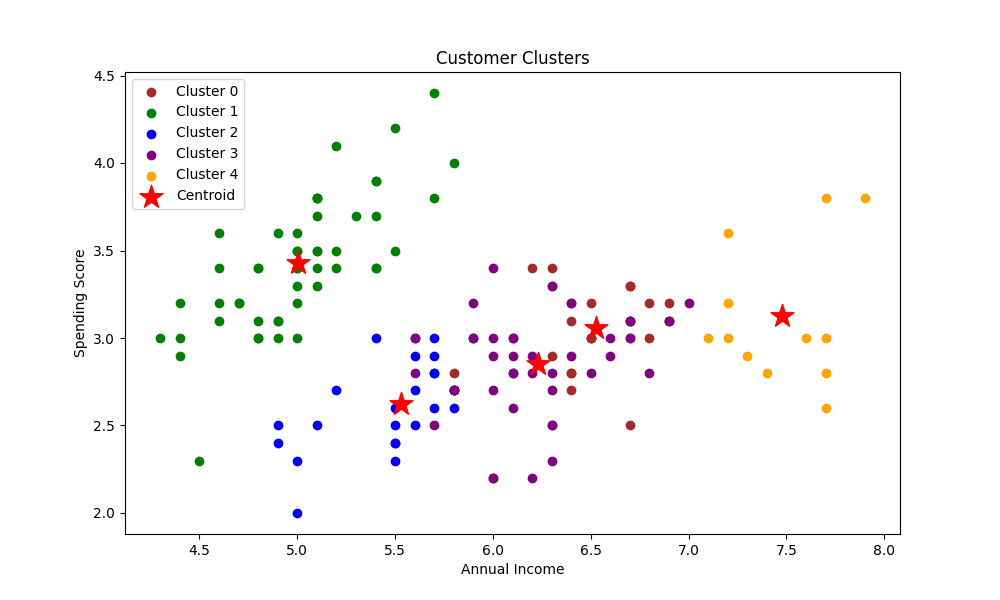

In [39]:
plt.figure(figsize=(10,6))
plt.scatter(X[pred == 0, 0], X[pred == 0, 1], c = 'brown', label = 'Cluster 0')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], c = 'green', label = 'Cluster 1')
plt.scatter(X[pred == 2, 0], X[pred == 2, 1], c = 'blue', label = 'Cluster 2')
plt.scatter(X[pred == 3, 0], X[pred == 3, 1], c = 'purple', label = 'Cluster 3')
plt.scatter(X[pred == 4, 0], X[pred == 4, 1], c = 'orange', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1],s = 300, c = 'red', label = 'Centroid', marker='*')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.title('Customer Clusters')

### Inner Working

```{note}
By using the elbow method we found the optimal number of clusters. Code below create visualization where 
you can slide the widget to select the number of clusters. 
The K-means algorithm is executed accordingly with the selected number of clusters, and the resulting clusters are 
visualized along with their centroids. This helps users observe how different cluster counts affect the grouping of data points. 
```

In [40]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from ipywidgets import interact, IntSlider

# Generate random data
df = pd.read_csv('https://raw.githubusercontent.com/satishgunjal/datasets/master/Mall_Customers.csv')
X = df.iloc[:, [3,4]].values
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X)
predict = kmeans.fit_predict(X)

def kmeans_interactive_X(num_clusters):
    # Fit KMeans model
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    return X[:,0]

def kmeans_interactive_Y(num_clusters):
    # Fit KMeans model
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    return X[:,1]

def cluster_centers_X(num_clusters):
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    return kmeans.cluster_centers_[:, 0]

def cluster_centers_Y(num_clusters):
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    return kmeans.cluster_centers_[:, 1]
    
def predict(num_clusters):
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    return kmeans.fit_predict(X)

fig = go.Figure()

fig.add_trace(go.Scatter(x=X[:, 0], y=X[:, 1], mode='markers', marker=dict(color=kmeans.labels_, size=10, opacity=0.7), name = 'predicted label'))
fig.add_trace(go.Scatter(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], mode='markers', marker=dict(color='red', size=12, symbol='star'), name='Centroids'))
fig.update_layout(title=dict(text='KMeans Clustering with different clusters', x=0.5, xanchor='center'), xaxis_title='Annual Income', yaxis_title='Spending Score', width=800,  # Set the width of the figure
    height=600)

fig.update_layout(sliders=[
    {
        'steps': [
            {
                'method': 'animate',
                'label': str(components),
                'args': [
                    [str(components)], 
                    {
                        'mode': 'immediate',
                        'frame': {'duration': 500, 'redraw': True},
                        'transition': {'duration': 300}
                    }
                ]
            }
            for components in range(2, 7)
        ],
        'currentvalue': {'prefix': 'Number of Clusters: '}
    }
])

frames = [go.Frame(data=[
        go.Scatter(
            x=kmeans_interactive_X(components), 
            y=kmeans_interactive_Y(components), 
            mode='markers', 
            marker=dict(color=predict(components), size=10, opacity=0.7),
            
        ),
        go.Scatter(
            x=cluster_centers_X(components), 
            y=cluster_centers_Y(components), 
            name = 'Centroids',
            mode='markers', 
            marker=dict(color='red', size=12, symbol='star'),
        )
    ], name=str(components)) for components in range(2, 7)]

fig.frames = frames
fig.show()

<div style="display:none" id="q_Inner_Working_Visualization">W3sicXVlc3Rpb24iOiAiV2hhdCBkb2VzIHRoZSBjb2RlIHZpc3VhbGl6YXRpb24gaW4gdGhlIElubmVyIFdvcmtpbmcgc2VjdGlvbiBoZWxwIHVzZXJzIG9ic2VydmU/IiwgInR5cGUiOiAibXVsdGlwbGVfY2hvaWNlIiwgImFuc3dlcnMiOiBbeyJhbnN3ZXIiOiAiQ29udmVyZ2VuY2Ugc3BlZWQiLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiSW5jb3JyZWN0LiBQbGVhc2UgcmV2aWV3IHRoZSBkZXRhaWxzIHJlbGF0ZWQgdG8gdGhpcyBxdWVzdGlvbiBmb3IgYSBiZXR0ZXIgdW5kZXJzdGFuZGluZy4ifSwgeyJhbnN3ZXIiOiAiSW1wYWN0IG9mIGRpZmZlcmVudCBjbHVzdGVyIGNvdW50cyIsICJjb3JyZWN0IjogdHJ1ZSwgImZlZWRiYWNrIjogIkNvcnJlY3QhIFRoZSB2aXN1YWxpemF0aW9uIGhlbHBzIHVzZXJzIG9ic2VydmUgdGhlIGltcGFjdCBvZiBkaWZmZXJlbnQgY2x1c3RlciBjb3VudHMuIn0sIHsiYW5zd2VyIjogIkRpc3RyaWJ1dGlvbiBvZiBvdXRsaWVycyIsICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJJbmNvcnJlY3QuIFRoZSB2aXN1YWxpemF0aW9uIGRvZXMgbm90IHNwZWNpZmljYWxseSBhZGRyZXNzIHRoZSBkaXN0cmlidXRpb24gb2Ygb3V0bGllcnMuIn0sIHsiYW5zd2VyIjogIkZlYXR1cmUgaW1wb3J0YW5jZSIsICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJJbmNvcnJlY3QuIFRoZSB2aXN1YWxpemF0aW9uIGlzIGZvY3VzZWQgb24gY2x1c3RlciBjb3VudHMsIG5vdCBmZWF0dXJlIGltcG9ydGFuY2UuIn1dfV0=</div>

In [41]:
display_quiz("#q_Inner_Working_Visualization")

<IPython.core.display.Javascript object>

## Metric selection

Since K-means works by sequentially repeating two steps until convergence, the validity of using different metrics or proximity functions depends on whether they “break” any of these steps or not.

The first step of assigning objects to the nearest centers does not depend on the type of metric. The second step involves recalculating the centers as the arithmetic mean of the points included in the cluster, and here there is a catch: it is the Euclidean metric that leads to the optimal choice of centers in the arithmetic mean.

## Mini-batch K-means

It is easy to see that, if we consider
$K$ and the dimension of the feature space are constants, both steps of the algorithm work in
$O(n)$, where n is the number of objects in the training sample. This is where the idea of speeding up the algorithm comes from. In mini-batch K-means, we do not count steps on the entire sample at once, but at each iteration we select a random subsample (mini-batch) and work on it. In the case when the initial sample is very large, switching to batch processing does not lead to a large loss of quality, but significantly speeds up the operation of the algorithm.

<div style="display:none" id="q_Metric_Selection">W3sicXVlc3Rpb24iOiAiV2hpY2ggbWV0cmljIGlzIGNydWNpYWwgZm9yIHRoZSBvcHRpbWFsIGNob2ljZSBvZiBjbHVzdGVyIGNlbnRlcnMgaW4gSy1tZWFucz8iLCAidHlwZSI6ICJzaW5nbGVfY2hvaWNlIiwgImFuc3dlcnMiOiBbeyJhbnN3ZXIiOiAiTWFuaGF0dGFuIGRpc3RhbmNlIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIkluY29ycmVjdC4gUGxlYXNlIHJldmlldyB0aGUgZGV0YWlscyByZWxhdGVkIHRvIHRoaXMgcXVlc3Rpb24gZm9yIGEgYmV0dGVyIHVuZGVyc3RhbmRpbmcuIn0sIHsiYW5zd2VyIjogIkhhbW1pbmcgZGlzdGFuY2UiLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiSW5jb3JyZWN0LiBIYW1taW5nIGRpc3RhbmNlIGlzIG5vdCBjb21tb25seSB1c2VkIGluIEstbWVhbnMgY2x1c3RlcmluZy4ifSwgeyJhbnN3ZXIiOiAiTWlua293c2tpIGRpc3RhbmNlIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIkluY29ycmVjdC4gV2hpbGUgTWlua293c2tpIGRpc3RhbmNlIGlzIGEgZ2VuZXJhbGl6YXRpb24sIHRoZSBFdWNsaWRlYW4gZGlzdGFuY2UgaXMgY3J1Y2lhbCBmb3IgSy1tZWFucy4ifSwgeyJhbnN3ZXIiOiAiRXVjbGlkZWFuIGRpc3RhbmNlIiwgImNvcnJlY3QiOiB0cnVlLCAiZmVlZGJhY2siOiAiQ29ycmVjdCEgVGhlIEV1Y2xpZGVhbiBkaXN0YW5jZSBpcyBjcnVjaWFsIGZvciB0aGUgb3B0aW1hbCBjaG9pY2Ugb2YgY2x1c3RlciBjZW50ZXJzIGluIEstbWVhbnMuIn1dfV0=</div>

In [48]:
display_quiz("#q_Metric_Selection")

<IPython.core.display.Javascript object>

<div style="display:none" id="q_diff_mini_k_means">W3sicXVlc3Rpb24iOiAiSG93IGRvZXMgdGhlIE1pbmktQmF0Y2ggSy1NZWFucyBhbGdvcml0aG0gZGlmZmVyIGZyb20gdGhlIHN0YW5kYXJkIEstTWVhbnM/IiwgInR5cGUiOiAibWFueV9jaG9pY2UiLCAiYW5zd2VycyI6IFt7ImFuc3dlciI6ICIgU2xvd2VyIGNvbnZlcmdlbmNlIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIkluY29ycmVjdC4gTWluaS1CYXRjaCBLLU1lYW5zIGlzIGRlc2lnbmVkIGZvciBmYXN0ZXIgY29udmVyZ2VuY2UgYnkgcHJvY2Vzc2luZyByYW5kb20gc3Vic2V0cywgbm90IHNsb3dlci4ifSwgeyJhbnN3ZXIiOiAiTW9yZSBhY2N1cmF0ZSByZXN1bHRzIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIkluY29ycmVjdC4gVGhlIGFjY3VyYWN5IG1heSBiZSBjb21wcm9taXNlZCBkdWUgdG8gdGhlIHVzZSBvZiBhIHN1YnNldCBvZiBkYXRhIHBvaW50cy4ifSwgeyJhbnN3ZXIiOiAiUmVkdWNlZCBjb21wdXRhdGlvbmFsIGNvc3QiLCAiY29ycmVjdCI6IHRydWUsICJmZWVkYmFjayI6ICJDb3JyZWN0ISBNaW5pLUJhdGNoIEstTWVhbnMgdXNlcyByYW5kb20gc3Vic2V0cywgbWFraW5nIGl0IGNvbXB1dGF0aW9uYWxseSBtb3JlIGVmZmljaWVudC4ifSwgeyJhbnN3ZXIiOiAiUmVkdWNlZCBtZW1vcnkgcmVxdWlyZW1lbnRzIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIkluY29ycmVjdC4gSXQgbWF5IHVzZSBsZXNzIG1lbW9yeSwgYnV0IHRoaXMgaXMgbm90IHRoZSBwcmltYXJ5IGRpc3RpbmN0aW9uLiJ9XX1d</div>

In [49]:
display_quiz("#q_diff_mini_k_means")

<IPython.core.display.Javascript object>

## K-means on MNIST

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

%config InlineBackend.figure_format = 'svg'

X, y = fetch_openml('mnist_784', return_X_y=True)
X = X.astype(float).values / 255
y = y.astype(int).values

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning:

The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.



Apply mini-batch K-means:

In [51]:
from sklearn.cluster import MiniBatchKMeans
kmeans_mini = MiniBatchKMeans(n_clusters=10, n_init=10)
%time kmeans_mini.fit(X)
print("Intertia:", kmeans_mini.inertia_)
print("Class labels:", kmeans_mini.labels_)

Wall time: 2.61 s
Intertia: 2773344.7611704497
Class labels: [4 0 3 ... 5 1 6]


Calculate silhouette score:

In [52]:
from sklearn.metrics import silhouette_score
%time silhouette_score(X, kmeans_mini.labels_, metric='euclidean')

Wall time: 2min 49s


0.054417254390661335

Now plot the cluster centers:

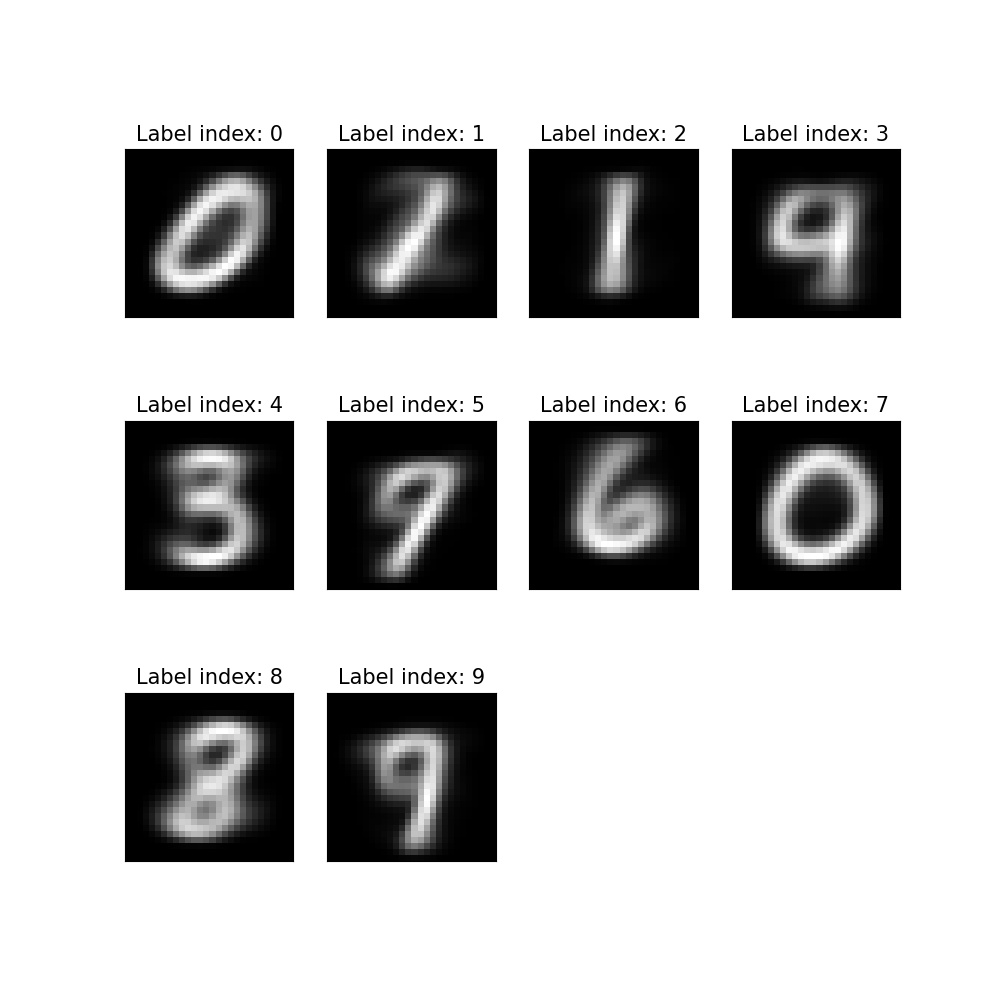

In [53]:
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(3, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(kmeans_mini.cluster_centers_[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label index: {i}", size=15)

Can you guess who is who here?

Now take the true K-means.

In [54]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, n_init=10)
%time kmeans.fit(X)
print("Intertia:", kmeans.inertia_)
print("Class labels:", kmeans.labels_)

Wall time: 1min 9s
Intertia: 2744061.4760060124
Class labels: [1 9 0 ... 7 6 3]


Silhouette score of K-means:

::::{important}
See {doc}`Clustering Metrics <..clustering_metrics.html>` for information on Silhouette score
::::

In [55]:
from sklearn.metrics import silhouette_score
%time silhouette_score(X, kmeans.labels_, metric='euclidean')

Wall time: 3min 6s


0.05877946247789031

Once again plot the centers of clusters:

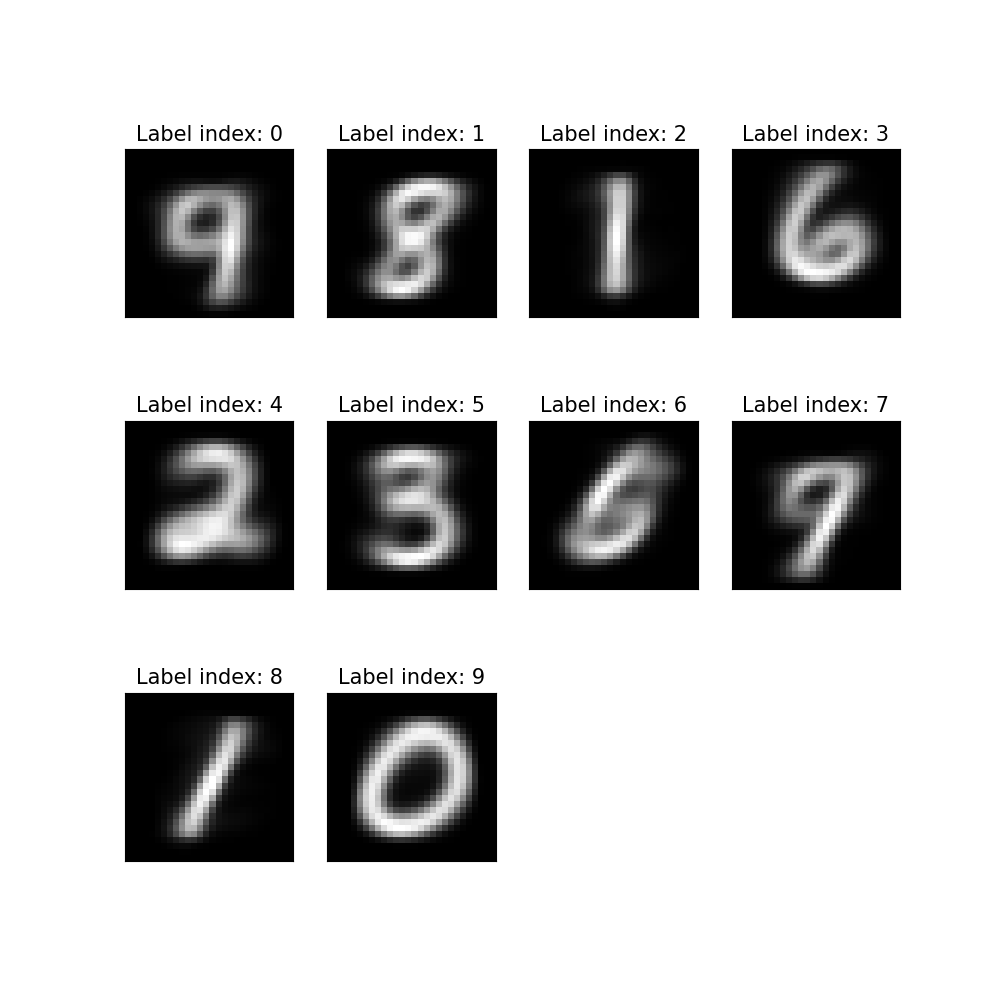

In [56]:
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(3, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(kmeans.cluster_centers_[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label index: {i}", size=15)

Resources:

* [ML Handbook](https://education.yandex.ru/handbook/ml/article/beta-klasterizaciya#metod-k-srednih)

* Skoltech [lecture](https://github.com/adasegroup/ML2023_lectures/tree/main/lecture16) on clusterizaion

* Kaggle [Tutorial: K-Means Clustering](https://www.kaggle.com/code/satishgunjal/tutorial-k-means-clustering#Index)